In [1]:
import warnings
warnings.filterwarnings('ignore')

import importlib

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

import torch as th
import torch_geometric as pyg

import pandas as pd

import LPGNN

2022-09-02 13:36:03.339594: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-02 13:36:03.339614: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [268]:
importlib.reload(LPGNN.popularity_similarity)
importlib.reload(LPGNN.poincare_embedding)
importlib.reload(LPGNN.distances)
importlib.reload(LPGNN.LinkPrediction)
importlib.reload(LPGNN.DataSetup)

<module 'LPGNN.DataSetup' from '/home/mf/Documents/IB/Tesis/Maestria/LPGNN/LPGNN/DataSetup.py'>

In [2]:
def gromov(G, node_i, node_j, node_k, node_l):
    node_tuple = np.random.choice(G.nodes(), 4, replace=False)
    try:
        d01 = nx.shortest_path_length(G, source=node_tuple[0], target=node_tuple[1], weight=None)
        d23 = nx.shortest_path_length(G, source=node_tuple[2], target=node_tuple[3], weight=None)
        d02 = nx.shortest_path_length(G, source=node_tuple[0], target=node_tuple[2], weight=None)
        d13 = nx.shortest_path_length(G, source=node_tuple[1], target=node_tuple[3], weight=None)
        d03 = nx.shortest_path_length(G, source=node_tuple[0], target=node_tuple[3], weight=None)
        d12 = nx.shortest_path_length(G, source=node_tuple[1], target=node_tuple[2], weight=None)

        s = [d01 + d23, d02 + d13, d03 + d12]
        s.sort()
        return (s[-1] - s[-2]) / 2
    except Exception as e:
        print('No shortest path')
        return None

def sample_hyperbolicity(G, num_samples=50000):
    hyps = []
    for i in range(num_samples):
        node_tuple = np.random.choice(G.nodes(), 4, replace=False)
        hyps.append(gromov(G, *node_tuple))

    return np.max(hyps), np.mean(hyps)

In [269]:
PS = LPGNN.popularity_similarity.generatePSNetwork(N=200, avg_k=6, gamma=2.7, T=0.0, seed=100)
PS = LPGNN.DataSetup.train_test_split(PS, test_ratio=0.7, val_ratio=0.1, neg_samples=True)
R, P = LPGNN.LinkPrediction.precision_recall_score_file(PS, position_name='node_polar_positions', filename='data/Distance_Lists/PS_200_6_2.7_0_sorted', chunk_size=2)

Test mask
Done
Hyperbolic
torch.Size([2, 19900])


KeyboardInterrupt: 

In [59]:
PS = LPGNN.DataSetup.train_test_split(PS, test_ratio=0.7, val_ratio=0.1, neg_samples=True)

In [68]:
PS = LPGNN.DataSetup.train_test_split(PS, test_ratio=0.7, val_ratio=0.1, neg_samples=True)

In [242]:
R, P = LPGNN.LinkPrediction.precision_recall_score_file(PS, filename='data/Distance_Lists/ASI_tree_LaBNE_sorted', chunk_size=100000, step_size=100000)

index: 288000000, R: 0.993, P: 0.000

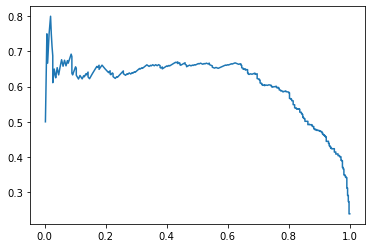

In [266]:
plt.plot(R, P)

In [47]:
LPGNN.distances.hyperbolic_distance_list_to_file(PS.node_polar_positions, chunk_size=1, filename='data/Distance_Lists/PS_10_6_2.7_0.8')

In [214]:
df = pd.read_csv('data/Distance_Lists/PS_2000_6_2.7_0_sorted', header=None, chunksize=10)

In [210]:
(2000*1999/2)-1998599

401.0

In [244]:
chunk = df.get_chunk(500)

In [267]:
ASI

NameError: name 'ASI' is not defined

In [224]:
for a in chunk.to_numpy()[:,:2]:
    print(a)

[  33. 1505.]
[ 83. 910.]
[136. 781.]
[ 54. 668.]
[43. 53.]
[ 87. 170.]
[  2. 119.]
[  0. 986.]
[  1. 312.]
[  72. 1303.]
[  73. 1245.]
[ 155. 1343.]
[437. 438.]
[158. 368.]
[ 50. 470.]
[  56. 1451.]
[267. 449.]
[  8. 181.]
[ 4. 12.]
[  13. 1928.]
[  27. 1916.]
[  29. 1383.]
[ 64. 815.]
[  77. 1896.]
[  90. 1597.]
[107. 754.]
[ 143. 1901.]
[ 345. 1228.]
[347. 753.]
[361. 750.]
[473. 559.]
[493. 905.]
[512. 537.]
[ 521. 1155.]
[   0. 1678.]
[ 20. 602.]
[54. 67.]
[39. 92.]
[ 27. 860.]
[ 34. 590.]
[142. 332.]
[147. 517.]
[ 2. 18.]
[  1. 291.]
[ 34. 297.]
[  54. 1028.]
[  59. 1197.]
[  73. 1118.]
[ 83. 603.]
[161. 935.]
[178. 242.]
[285. 721.]
[348. 602.]
[ 76. 141.]
[ 70. 748.]
[  0. 920.]
[  2. 310.]
[ 49. 100.]
[ 85. 421.]
[ 74. 180.]
[143. 698.]
[ 165. 1148.]
[228. 910.]
[239. 968.]
[ 244. 1008.]
[248. 826.]
[ 296. 1207.]
[ 312. 1001.]
[365. 864.]
[467. 739.]
[ 24. 864.]
[ 54. 595.]
[ 40. 633.]
[  55. 1035.]
[  76. 1461.]
[ 84. 957.]
[ 15. 525.]
[  1. 442.]
[ 11. 664.]
[ 25. 903.]
[110

In [217]:
for edge in chunk:
    print(edge)

0
1
2


In [134]:
t = th.Tensor(chunk.to_numpy()[:,:2]).type(th.int)

In [180]:
PS.test_pos_edge_label_index.T.shape

torch.Size([4195, 2])

In [179]:
# check if the entries in t, which represent edges, are in PS.test_pos_edge_label_index
# if they are, then they are in the test set
print('Checking if the edges in t are in the test set...')
th.eq(t[:,None], PS.test_pos_edge_label_index.T)

Checking if the edges in t are in the test set...


tensor([[[False, False],
         [False, False],
         [False, False],
         ...,
         [False, False],
         [False, False],
         [False, False]],

        [[False, False],
         [False, False],
         [False, False],
         ...,
         [False, False],
         [False, False],
         [False, False]],

        [[False, False],
         [False, False],
         [False, False],
         ...,
         [False, False],
         [False, False],
         [False, False]],

        ...,

        [[False, False],
         [False, False],
         [False, False],
         ...,
         [False, False],
         [False, False],
         [False, False]],

        [[False, False],
         [False, False],
         [False, False],
         ...,
         [False, False],
         [False, False],
         [False, False]],

        [[False, False],
         [False, False],
         [False, False],
         ...,
         [False, False],
         [False, False],
         [ True, 

In [160]:
(1008 == PS.test_pos_edge_label_index)[0]*(1918 == PS.test_pos_edge_label_index)[1]

tensor([ True, False, False,  ..., False, False, False])

In [181]:
for t_ in t:
    print(t_)

tensor([ 97, 207], dtype=torch.int32)
tensor([0, 7], dtype=torch.int32)
tensor([   5, 1329], dtype=torch.int32)
tensor([  60, 1151], dtype=torch.int32)
tensor([147, 300], dtype=torch.int32)
tensor([148, 250], dtype=torch.int32)
tensor([224, 848], dtype=torch.int32)
tensor([302, 687], dtype=torch.int32)
tensor([311, 724], dtype=torch.int32)
tensor([  5, 301], dtype=torch.int32)
tensor([ 20, 905], dtype=torch.int32)
tensor([  3, 143], dtype=torch.int32)
tensor([178, 193], dtype=torch.int32)
tensor([  28, 1610], dtype=torch.int32)
tensor([ 29, 652], dtype=torch.int32)
tensor([164, 373], dtype=torch.int32)
tensor([ 15, 205], dtype=torch.int32)
tensor([ 86, 196], dtype=torch.int32)
tensor([  40, 1056], dtype=torch.int32)
tensor([190, 336], dtype=torch.int32)
tensor([262, 298], dtype=torch.int32)
tensor([ 16, 173], dtype=torch.int32)
tensor([ 28, 204], dtype=torch.int32)
tensor([ 3, 79], dtype=torch.int32)
tensor([   0, 1103], dtype=torch.int32)
tensor([  11, 1711], dtype=torch.int32)
tensor

In [163]:
if th.any(((1008 == PS.test_pos_edge_label_index)[0]*(1918 == PS.test_pos_edge_label_index)[1])[0]):
    print('a')

a


In [48]:
LPGNN.LinkPrediction.sort_distance_file(filename='data/Distance_Lists/PS_10_6_2.7_0.8', sort_dir='asc')

In [50]:
LPGNN.LinkPrediction.precision_recall_score_file(PS, 'data/Distance_Lists/PS_10_6_2.7_0.8_sorted', chunk_size=10)

2,6,0.996886134

0,9,2.726230621

1,5,3.543747902

0,7,3.545246363

0,2,3.60402441

0,8,4.165731907

0,1,4.179531097

2,8,4.190758228

0,6,4.597750664

1,4,4.80706501

4,5,4.959824562

6,8,5.145062923

0,3,5.261939049

0,4,5.645148277

0,5,5.698954105

2,3,5.828891277

1,2,5.872468948

1,3,5.948015213

7,9,6.048001766

2,9,6.153076172

3,4,6.191603184

1,7,6.211793423

8,9,6.53574419

2,7,6.631363392

3,6,6.822648525

1,6,6.869384289

2,4,6.904601097

1,9,6.905268669

3,5,6.957425117

1,8,7.076507092

6,9,7.145417213

2,5,7.192193508

7,8,7.422314167

3,8,7.46585083

6,7,7.627013683

3,7,7.835355759

5,7,7.87086153

4,6,7.901085377

3,9,7.949380398

4,7,7.950716496

5,6,8.188991547

4,8,8.261101723

4,9,8.360965729

5,9,8.421432495

5,8,8.464575768



In [12]:
PS_Labne = LPGNN.labne.generateLaBNE(PS)

torch.Size([500])
Calculating best minimal value for power law fit


In [134]:
list(nx.adamic_adar_index(PS_nx, [(10,20)]))[0][2]

0.23868315209103041

In [13]:
PS_nx = nx.Graph(pyg.utils.to_networkx(PS))
for u,v in PS_nx.edges():
    PS_nx[u][v]['weight'] = 1/(list(nx.adamic_adar_index(PS_nx, [(u,v)]))[0][2]+0.1)
PS_nx_tree = nx.minimum_spanning_tree(PS_nx)

In [14]:
for u,v,d in PS_nx.edges(data=True):
    if not (u,v) in PS_nx_tree.edges() and np.random.uniform() < 0.1:
        print('A ', end='')
        PS_nx_tree.add_edge(u,v,weight=d['weight'])

A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A 

In [15]:
#PS_nx_tree.number_of_edges(), PS_nx.number_of_edges()
PS_tree = PS.clone()
PS_tree.edge_index = th.tensor(nx.to_numpy_array(PS_nx_tree).nonzero()).long()
print(PS_tree.edge_index.shape)

torch.Size([2, 1180])


(<Figure size 720x720 with 1 Axes>, <PolarAxesSubplot:>)

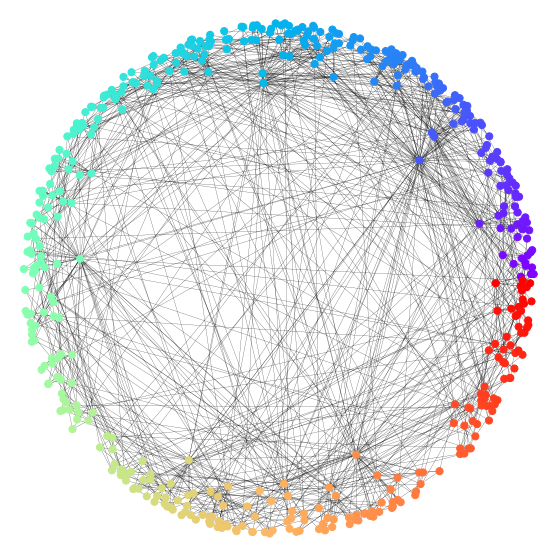

In [16]:
LPGNN.popularity_similarity.drawPSNetwork(PS, polar_projection=True, with_labels=False, figsize=(10,10))

(<Figure size 720x720 with 1 Axes>, <PolarAxesSubplot:>)

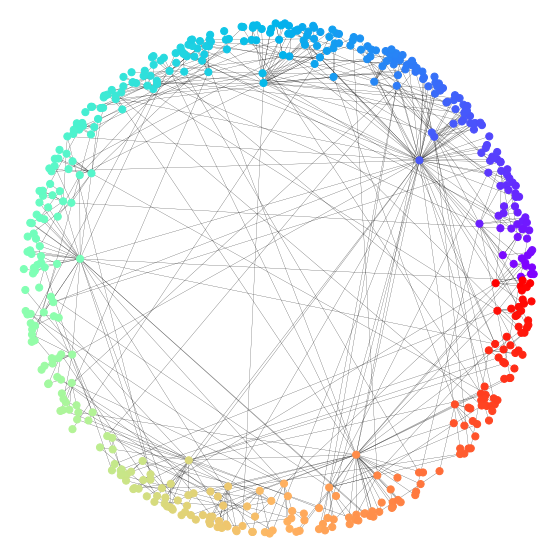

In [17]:
LPGNN.popularity_similarity.drawPSNetwork(PS_tree, polar_projection=True, with_labels=False, figsize=(10,10))

In [18]:
PS_tree_labne = LPGNN.labne.generateLaBNE(PS_tree)

torch.Size([500])
Calculating best minimal value for power law fit


In [23]:
PS_tree_poincare = LPGNN.poincare_embedding.poincare_embedding(PS_tree_labne, initial_coordinates='LaplacianEigenmaps_node_positions', size=2, epochs=100, negative=3)

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

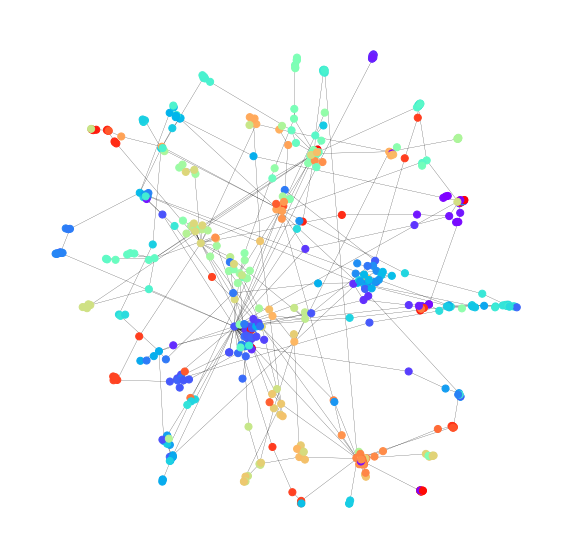

In [24]:
LPGNN.popularity_similarity.drawPSNetwork(PS_tree_poincare, polar_projection=False, with_labels=False, figsize=(10,10), pos_name='PoincareEmbedding_node_positions')

(<Figure size 720x720 with 1 Axes>, <PolarAxesSubplot:>)

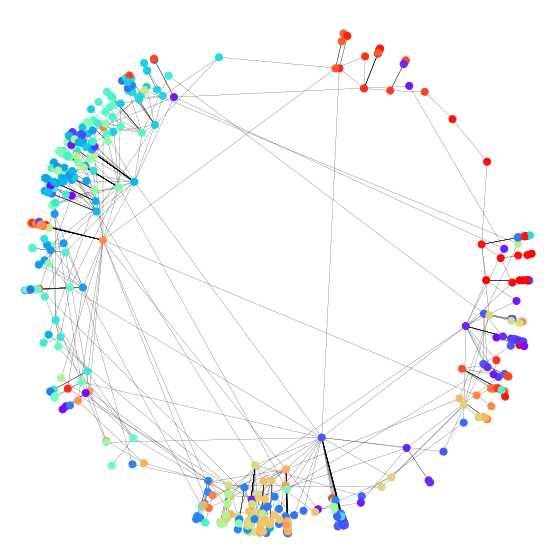

In [167]:
LPGNN.popularity_similarity.drawPSNetwork(PS_tree_labne, polar_projection=True, with_labels=False, figsize=(10,10), pos_name='LaBNE_node_polar_positions')

(<Figure size 720x720 with 1 Axes>, <PolarAxesSubplot:>)

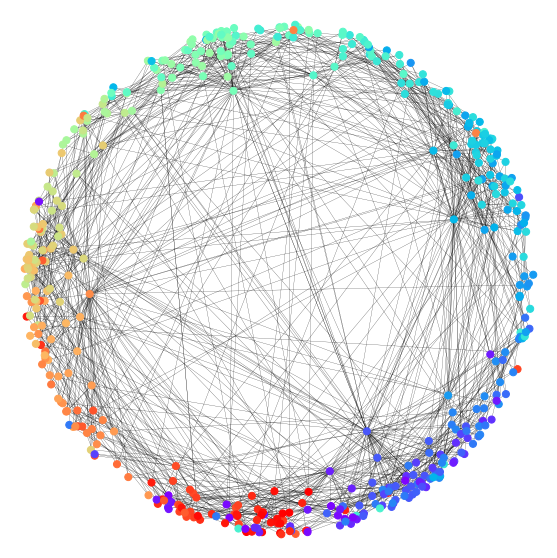

In [170]:
LPGNN.popularity_similarity.drawPSNetwork(PS_Labne, polar_projection=True, with_labels=False, figsize=(10,10), pos_name='LaBNE_node_polar_positions')

In [47]:
nx.average_shortest_path_length(nx.Graph(pyg.utils.to_networkx(PS)))

5.251658291457287

In [70]:
sum(np.arange(len(edges)) / np.sum(np.arange(len(edges))))

1.0

In [71]:
def random_edge_remove(data:pyg.data.Data, total_remove=100, max_iter=100000):
    G = pyg.utils.to_networkx(data)
    G = nx.Graph(G)
    t = 0
    t_c = 0
    while t < total_remove and t_c < max_iter:
        edges = list(G.edges())
        random_edge = np.random.choice(len(edges), 1, p=np.arange(len(edges)) / np.sum(np.arange(len(edges))))[0]
        edge = edges[random_edge]
        G.remove_edge(*edge)
        if not nx.is_connected(G):
            G.add_edge(*edge)
        else:
            try:
                shortest_path_length = nx.shortest_path_length(G, source=edge[0], target=edge[1], weight=None)
                if shortest_path_length <= 2:
                    G.add_edge(*edge)
                else:
                    t += 1
                    #print('Removed edge {}'.format(edge), 'length now {}'.format(shortest_path_length))
            except:
                G.add_edge(*edge)
        t_c += 1

    return G.edges()

In [95]:
new_edges = random_edge_remove(PS, total_remove=30, max_iter=1000)
PS.edge_index = th.Tensor(np.array(new_edges).T).type(th.int64)
PS.edge_index = pyg.utils.to_undirected(PS.edge_index)
PS.edge_index.shape

torch.Size([2, 574])

In [96]:
PS_PrunedLabne = LPGNN.labne.generateLaBNE(PS)

torch.Size([200])
Calculating best minimal value for power law fit


In [98]:
PS_PrunedLabne.edge_index = PS.edge_index

(<Figure size 720x720 with 1 Axes>, <PolarAxesSubplot:>)

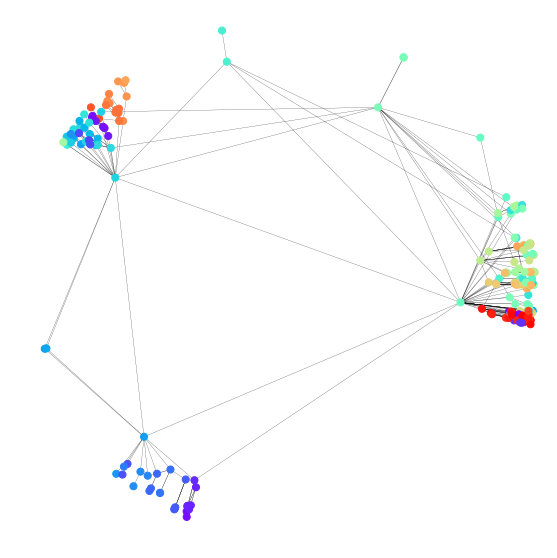

In [99]:
LPGNN.popularity_similarity.drawPSNetwork(PS_PrunedLabne, polar_projection=True, with_labels=False, figsize=(10,10), pos_name='LaBNE_node_polar_positions')

In [100]:
ASI = th.Tensor(np.loadtxt('Network_Files/ASI_t0.txt')).T.type(th.int64)
ASI = ASI-1
ASI = pyg.utils.to_undirected(ASI)
ASI = pyg.data.Data(edge_index=ASI)
#ASI = pyg.utils.remove_isolated_nodes(ASI)[0]
ASI_nx = pyg.utils.to_networkx(ASI)

/home/mf/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/torch_geometric/data/storage.py:259: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


In [102]:
new_edges = random_edge_remove(ASI, total_remove=3000, max_iter=1000)
ASI.edge_index = th.Tensor(np.array(new_edges).T).type(th.int64)
ASI.edge_index = pyg.utils.to_undirected(ASI.edge_index)
ASI.edge_index.shape

torch.Size([2, 118704])

In [103]:
ASI_nx = pyg.utils.to_networkx(ASI)
nx.average_shortest_path_length(ASI_nx)

/home/mf/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/torch_geometric/data/storage.py:259: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


3.527343567015746

In [186]:
PGP = th.Tensor(np.loadtxt('Network_Files/PGP_t0.txt')).T.type(th.int64)
PGP = PGP-1
PGP = pyg.utils.to_undirected(PGP)
PGP = pyg.data.Data(edge_index=PGP)
#PGP = pyg.utils.remove_isolated_nodes(PGP)[0]
PGP_nx = pyg.utils.to_networkx(PGP)
PGP_nx = nx.Graph(nx.to_undirected(PGP_nx))

/home/mf/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/torch_geometric/data/storage.py:259: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


In [193]:
while 1:
    edges = nx.bidirectional_shortest_path(PGP_nx, 0, 2000)
    if len(edges) > 20:
        print(edges)
        break
    PGP_nx.remove_edge(edges[5], edges[6])
nx.is_connected(PGP_nx)

NetworkXNoPath: No path between 0 and 2000.

In [194]:
nx.is_connected(PGP_nx)

False

In [131]:
nx.bidirectional_shortest_path(ASI_nx, 6000, 12001)

[6000, 10, 2, 12001]

In [68]:
PS_nx = pyg.utils.to_networkx(PS)

In [71]:
nx.bidirectional_shortest_path(PS_nx, 187, 1260)

[187, 30, 3, 13, 1260]

In [73]:
nx.astar_path(PS_nx, 187, 1260)

[187, 30, 3, 13, 1260]

In [72]:
sht_paths = list(nx.all_pairs_shortest_path(PS_nx))

In [65]:
for path in sht_paths:
    print(path[0])
    for key, value in path[1].items():
        print("    ", key, value)

0
     0 [0]
     1 [0, 1]
     2 [0, 2]
     3 [0, 3]
     5 [0, 5]
     8 [0, 8]
     11 [0, 11]
     15 [0, 15]
     17 [0, 17]
     19 [0, 19]
     20 [0, 20]
     22 [0, 22]
     25 [0, 25]
     31 [0, 31]
     35 [0, 35]
     36 [0, 36]
     38 [0, 38]
     42 [0, 42]
     49 [0, 49]
     52 [0, 52]
     56 [0, 56]
     57 [0, 57]
     75 [0, 75]
     114 [0, 114]
     116 [0, 116]
     118 [0, 118]
     123 [0, 123]
     124 [0, 124]
     129 [0, 129]
     130 [0, 130]
     132 [0, 132]
     134 [0, 134]
     146 [0, 146]
     149 [0, 149]
     153 [0, 153]
     154 [0, 154]
     167 [0, 167]
     184 [0, 184]
     185 [0, 185]
     197 [0, 197]
     4 [0, 1, 4]
     6 [0, 1, 6]
     10 [0, 1, 10]
     13 [0, 1, 13]
     37 [0, 1, 37]
     41 [0, 1, 41]
     73 [0, 1, 73]
     83 [0, 1, 83]
     95 [0, 1, 95]
     100 [0, 1, 100]
     103 [0, 1, 103]
     109 [0, 1, 109]
     131 [0, 1, 131]
     148 [0, 1, 148]
     163 [0, 1, 163]
     170 [0, 1, 170]
     196 [0, 1, 196]
    